<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/K-Means/EastWestAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EastWestAirline- KMeans


#**Context:**

The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program.
For each passenger the data include information on their mileage history and on different ways they accrued or
spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics
for the purpose of targeting different segments for different types of mileage offers



#**Objective:**

 To identify clusters of passengers with similar mileage and spending habits to enable targeted marketing of mileage offers and improve campaign effectiveness.


#**Data Dictionary:**

ID:
Unique ID


Balance:
Number of miles eligible for award travel


Qual_miles:
Number of miles counted as qualifying for Topflight status


cc1_miles:
Number of miles earned with freq. flyer credit card in the past 12 months:


cc2_miles:
Number of miles earned with Rewards credit card in the past 12 months:


cc3_miles:
Number of miles earned with Small Business credit card in the past 12 months:


Bonus_miles:
Number of miles earned from non-flight bonus transactions in the past 12 months


Bonus_trans:
Number of non-flight bonus transactions in the past 12 months


Flight_miles_12mo:
Number of flight miles in the past 12 months


Flight_trans_12:
Number of flight transactions in the past 12 months

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Loading the dataset

In [2]:
df=pd.read_csv('EastWestAirlines.csv')

In [3]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


**Checking the info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


**Observations:**

There are 3999 rrows and 12 columns with integer datatype.

# **Checking for null values**

In [5]:
df.isnull().sum()

,0
ID,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


**Observation:**

There are no null values in the dataset.

#Checking for duplicate values.

In [6]:
df.duplicated().sum()

0

**Observations:

There are no duplicate values.

#**Exploratory Data Analysis**

#Summary statistics

In [7]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


#Checking for correlation between variables.

In [8]:
df.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


<Axes: >

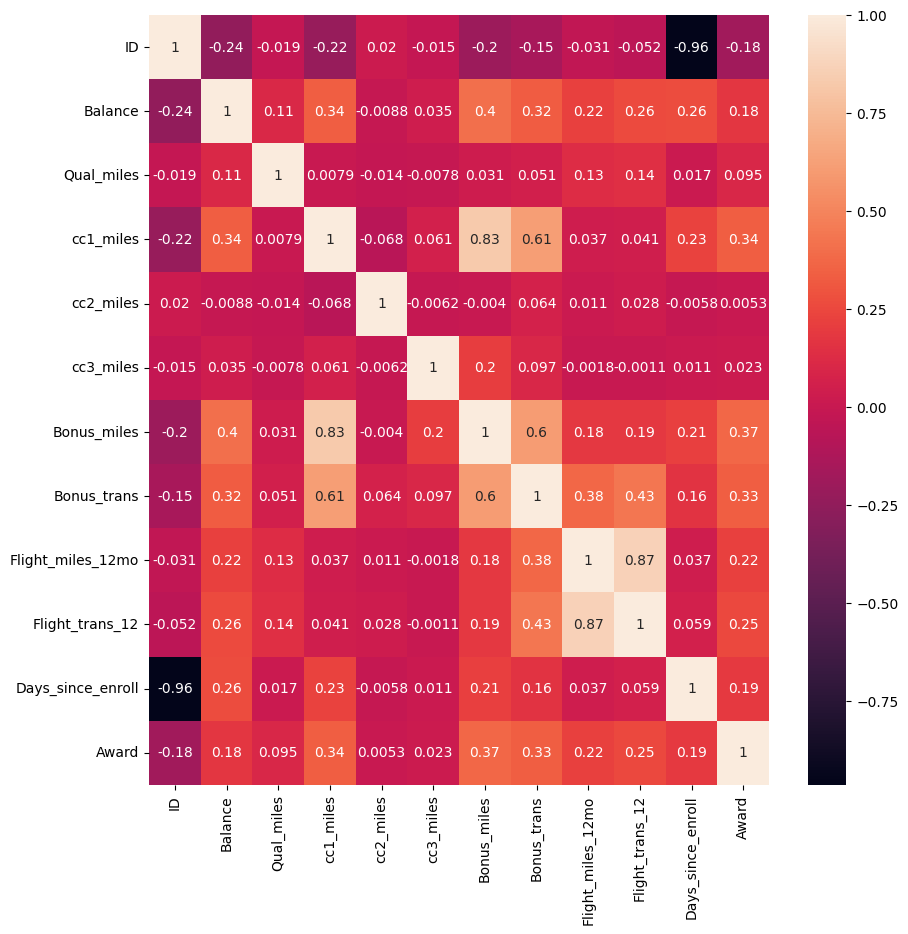

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

#**Scaling the data**

- Clustering algorithms are distance-based algorithms, and all distance-based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering.
- We will drop the variables "ID" variable because it is unique for each country and would not add value to clustering.

In [11]:
df_new=df.drop(['ID'],axis=1)

In [13]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)


In [14]:
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


#**K-Means Clustering**

**Elbow technique**

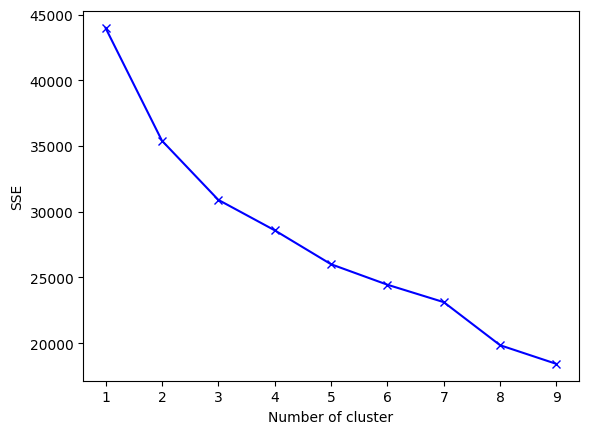

In [15]:
# Empty dictionary to store the SSE for each value of K
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_scaled)

    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

**Observations:**

- We can see from the plot that there are elbows at 3 and 8.
- So, let's look at another method to get a 'second opinion'. Let's create a plot with Silhouette scores to see how it varies with K.

**Silhouette score**

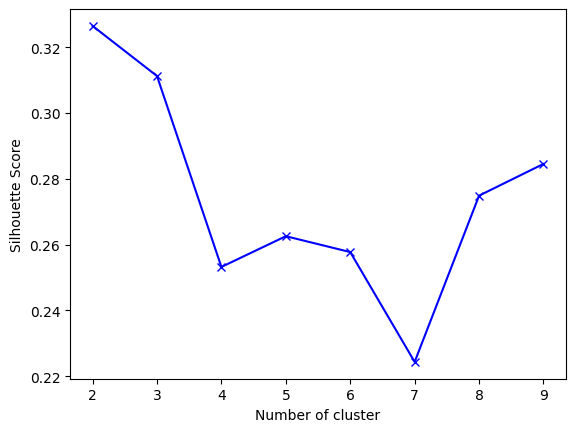

In [18]:
from sklearn.metrics import silhouette_score

# Empty dictionary to store the Silhouette score for each value of K
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_scaled)

    labels = kmeans.predict(df_scaled)

    sc[k] = silhouette_score(df_scaled, labels)

# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("Silhouette Score")

plt.show()

**Observations:**

From the plot, we can understand that silhouette_score is the highest for k=3.Lets understand 3 clusters

In [20]:
kmeans = KMeans(n_clusters = 3, random_state = 1)

kmeans.fit(df_scaled)

# Adding predicted labels to the original data and the scaled data
df_scaled['KMeans_Labels'] = kmeans.predict(df_scaled)

df_new['KMeans_Labels'] = kmeans.predict(df_scaled)

In [21]:
df_new['KMeans_Labels'].value_counts()

,count
KMeans_Labels,
1,2859
0,975
2,165


**Observation:**

- This looks like a very skewed clustering, with only 165 observations in one cluster and more than a 2500 in another. Let's check out the profiles of these clusters.

In [22]:
df_new.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMeans_Labels
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [25]:
# Calculating the mean and the median of the original data for each label
mean = df_new.groupby('KMeans_Labels').mean()

median = df_new.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['cluster_0 Mean', 'cluster_1 Mean', 'cluster_2 Mean', 'cluster_0 Median', 'cluster_1 Median', 'cluster_2 Median']

df_kmeans.T

,cluster_0 Mean,cluster_1 Mean,cluster_2 Mean,cluster_0 Median,cluster_1 Median,cluster_2 Median
Balance,128274.498462,47406.181532,204423.030303,92875.0,30892.0,126680.0
Qual_miles,139.158974,106.649878,822.557576,0.0,0.0,0.0
cc1_miles,3.985641,1.390346,2.272727,4.0,1.0,1.0
cc2_miles,1.002051,1.017489,1.036364,1.0,1.0,1.0
cc3_miles,1.043077,1.001399,1.018182,1.0,1.0,1.0
Bonus_miles,46265.464615,6177.007345,35111.200000,40533.0,3175.0,21181.0
Bonus_trans,19.634872,7.903813,28.212121,18.0,6.0,27.0
Flight_miles_12mo,384.955897,206.140259,5303.490909,0.0,0.0,4387.0
Flight_trans_12,1.148718,0.633438,15.527273,0.0,0.0,13.0
Days_since_enroll,4995.304615,3779.242392,4817.230303,5091.0,3623.0,4967.0


**Observations:**

* It looks like cluster_1 is the largest cluster that has the customers with low balance and less Bonus_miles and also less number of days since enroll, compare to other clusters.

* Cluster_0 has the customers with highest Bonus_miles and moderate balance.

* Cluster_2 has the customers with highest balance and significantly more flight miles in the last 12 months.

# **Lets now visualize the clusters**

In [26]:
df.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

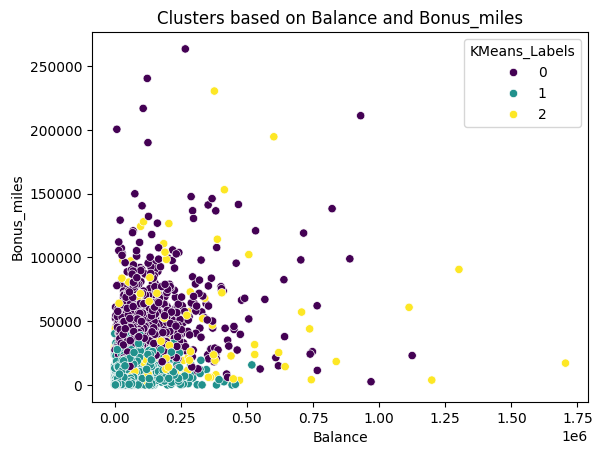

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Balance', y='Bonus_miles', hue='KMeans_Labels', data=df_new, palette='viridis')
plt.title('Clusters based on Balance and Bonus_miles' )
plt.show()

**Observation:**

We can observe that cluster_1 customers has highest bonus miles.

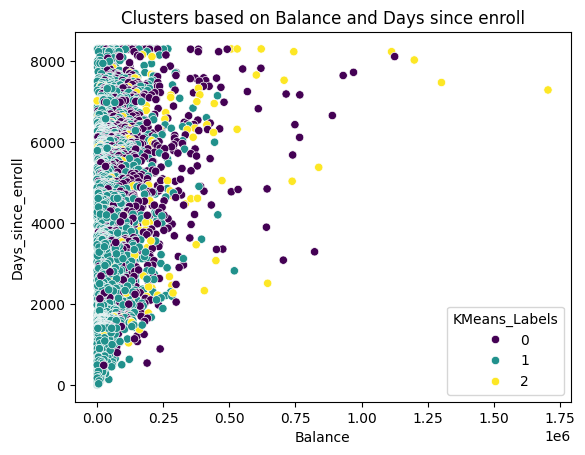

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Balance', y='Days_since_enroll', hue='KMeans_Labels', data=df_new, palette='viridis')
plt.title('Clusters based on Balance and Days since enroll')
plt.show()

**Observation:**

* We can observe cluster_1 is the largest cluster which has low balance irrespective of number of days since enroll.

* cluster_0 shows as number of days since enroll increases, balance also increases gradually.

#**Conclusion:**

Based on the means and medians, we can profile the three clusters:

**Cluster 0: High-Value Customers**

* High balance, bonus miles, and bonus transactions.

* Moderate flight activity.

* Longest tenure (days since enrollment).

* High award usage.

These are likely the most loyal and engaged customers, actively earning and redeeming miles.

**Cluster 1: Low-Value Customers**

* Low balance, bonus miles, and bonus transactions.

* Low flight activity.

* Shortest tenure.

* Low award usage.

These customers may be infrequent flyers or new to the program.

**Cluster 2: Frequent Flyers**


* Moderate balance and bonus miles.

* Very high flight activity (both miles and transactions).

* Moderate tenure.

* High award usage.

These customers are characterized by their frequent flying, even if their overall engagement with the program (balance, bonus transactions) is not as high as cluster 0.

#**Recommendations**

Cluster 0: Retain these high-value customers with exclusive offers and personalized services.

Cluster 1: Encourage greater engagement with targeted promotions and incentives to earn more miles.

Cluster 2: Recognize their loyalty as frequent flyers with benefits that enhance their travel experience.